<a href="https://colab.research.google.com/github/Unnimaya2712/English-to-French-Translator-using-lstm/blob/master/English2FrenchTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade tensorflow-gpu==2.0

Requirement already up-to-date: tensorflow-gpu==2.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [ ]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [ ]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
df_english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [ ]:
df_french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [ ]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df = pd.concat([df_english,df_french],axis = 1)

In [ ]:
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [ ]:
print("Total English records = {}".format(len(df['english'])))
print("Total French records = {}".format(len(df['french'])))

Total English records = 137860
Total French records = 137860


 PERFORM DATA CLEANING

In [ ]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [ ]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [ ]:
english_words = []
french_words  = []

In [ ]:
def get_unique_words(x,word_list):
  for word in x.split():
    if word not in word_list:
      word_list.append(word)

df['english'].apply(lambda x: get_unique_words(x,english_words) )
df['french'].apply(lambda x: get_unique_words(x,french_words) )
print(english_words)
total_english_words=len(english_words)
total_english_words

['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', 'and', 'it', 'snowy', 'in', 'april', 'the', 'united', 'states', 'usually', 'chilly', 'july', 'freezing', 'november', 'california', 'march', 'hot', 'june', 'mild', 'cold', 'september', 'your', 'least', 'liked', 'fruit', 'grape', 'but', 'my', 'apple', 'his', 'favorite', 'orange', 'paris', 'relaxing', 'december', 'busy', 'spring', 'never', 'our', 'lemon', 'january', 'warm', 'lime', 'her', 'banana', 'he', 'saw', 'a', 'old', 'yellow', 'truck', 'india', 'rainy', 'that', 'cat', 'was', 'most', 'loved', 'animal', 'dislikes', 'grapefruit', 'limes', 'lemons', 'february', 'china', 'pleasant', 'october', 'wonderful', 'nice', 'summer', 'france', 'may', 'grapes', 'mangoes', 'their', 'mango', 'pear', 'august', 'beautiful', 'apples', 'peaches', 'feared', 'shark', 'wet', 'dry', 'we', 'like', 'oranges', 'they', 'pears', 'she', 'little', 'red', 'winter', 'disliked', 'rusty', 'car', 'strawberries', 'i', 'strawberry', 'bananas', 'going', 'to'

199

In [ ]:
# number of unique words in french
print(french_words)
total_french_words=len(french_words)
total_french_words

['new', 'jersey', 'est', 'parfois', 'calme', 'pendant', "l'", 'automne', 'et', 'il', 'neigeux', 'en', 'avril', 'les', 'états-unis', 'généralement', 'froid', 'juillet', 'gèle', 'habituellement', 'novembre', 'california', 'mars', 'chaud', 'juin', 'légère', 'fait', 'septembre', 'votre', 'moins', 'aimé', 'fruit', 'le', 'raisin', 'mais', 'mon', 'la', 'pomme', 'son', 'préféré', "l'orange", 'paris', 'relaxant', 'décembre', 'occupé', 'au', 'printemps', 'jamais', 'chaude', 'notre', 'citron', 'janvier', 'chaux', 'des', 'fruits', 'banane', 'a', 'vu', 'un', 'vieux', 'camion', 'jaune', 'inde', 'pluvieux', 'ce', 'chat', 'était', 'animal', 'plus', "n'aime", 'pamplemousse', 'citrons', 'verts', 'californie', 'ne', 'février', 'gel', 'chine', 'agréable', 'octobre', 'merveilleux', 'doux', 'tranquille', 'à', "l'automne", 'été', 'france', 'mois', 'de', 'mai', 'frisquet', 'déteste', 'raisins', 'mangues', 'leur', 'mangue', 'poire', 'août', 'beau', 'pommes', 'pêches', 'redouté', 'que', 'requin', 'humide', "d'"

350

VISUALIZE CLEANED UP DATASET

In [ ]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [ ]:
# Obtain the total count of words
english_words_counts = Counter(words)
english_words_counts

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [ ]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [ ]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [ ]:
english_counts

[205858,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 28332,
 27564,
 27192,
 14934,
 14166,
 14046,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10692,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5166,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 870,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 540,
 480,
 476,
 384,
 378,
 378,
 378,
 360,
 312,
 312,
 312,
 312,
 312,
 30

In [ ]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

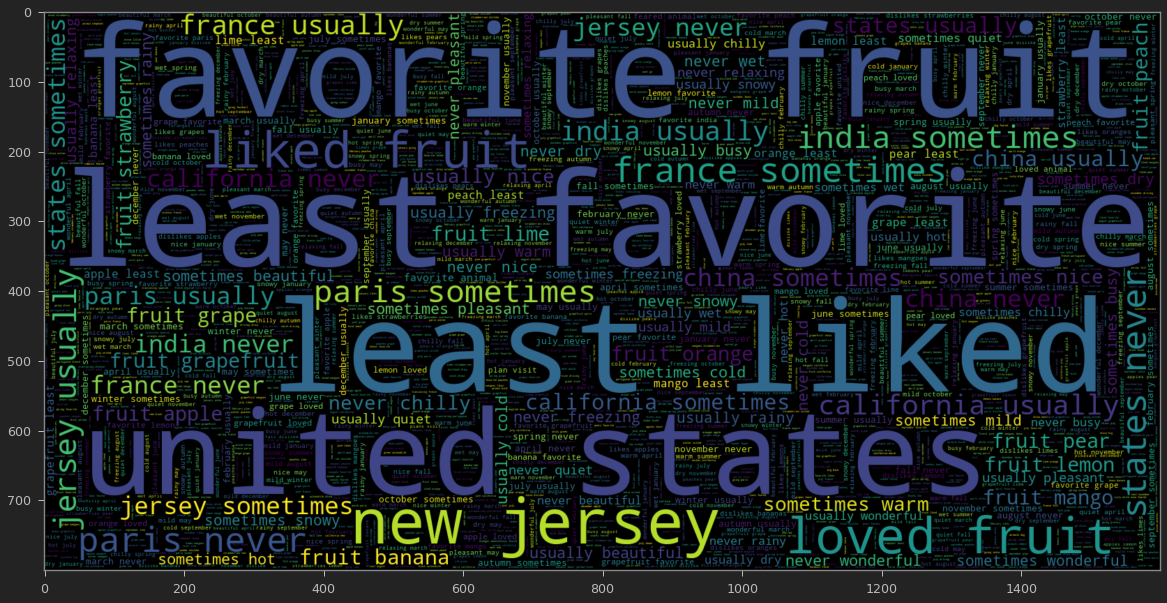

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [ ]:
# Obtain list of all words in the dataset
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)

In [ ]:
words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [ ]:
# Obtain the total count of words
french_words_counts = Counter(words)
french_words_counts

Counter({'-': 328,
         '-ce': 95,
         '-elle': 24,
         '-il': 36,
         '-ils': 26,
         'a': 1356,
         'agréable': 17751,
         'aimait': 707,
         'aime': 8870,
         'aiment': 1116,
         'aiment-ils': 10,
         'aimeraient': 12,
         'aimez': 1053,
         'aimons': 1111,
         'aimé': 25852,
         'aimée': 105,
         'aimés': 237,
         'aller': 1180,
         'allez': 45,
         'allions': 1,
         'allons': 45,
         'allé': 187,
         'allée': 150,
         'allés': 150,
         'amusant': 260,
         'anglais': 312,
         'animal': 2248,
         'animaux': 768,
         'août': 8789,
         'apprécié': 2,
         'as-tu': 1,
         'at': 32,
         'au': 25738,
         'automne': 14727,
         'automobile': 278,
         'aux': 392,
         'avez': 162,
         'avons': 19,
         'avril': 8954,
         'banane': 4848,
         'bananes': 5844,
         'beau': 6387,
         'belle': 

In [ ]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)
french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [ ]:
# append the values to a list for visualization purposes
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [ ]:
# append the values to a list for visualization purposes
french_words

['est',
 'en',
 'il',
 'les',
 'mais',
 'et',
 'la',
 'parfois',
 'jamais',
 'le',
 "l'",
 'généralement',
 'moins',
 'aimé',
 'au',
 'fruit',
 'préféré',
 'agréable',
 'froid',
 'son',
 'chaud',
 'de',
 'plus',
 'automne',
 'mois',
 'à',
 'elle',
 'citrons',
 'paris',
 'inde',
 'états-unis',
 'france',
 'jersey',
 'new',
 'chine',
 'pendant',
 'pamplemousse',
 'mon',
 'votre',
 'juin',
 'printemps',
 'janvier',
 'hiver',
 'mars',
 'été',
 'mai',
 'septembre',
 'juillet',
 'avril',
 'novembre',
 'décembre',
 'février',
 'octobre',
 'aime',
 'août',
 'merveilleux',
 'relaxant',
 'doux',
 'humide',
 'notre',
 'californie',
 'sec',
 'leur',
 'occupé',
 'pluvieux',
 'calme',
 'beau',
 'habituellement',
 'pommes',
 'pêches',
 'oranges',
 'poires',
 'fraises',
 'bananes',
 'verts',
 'raisins',
 'mangues',
 "d'",
 'mangue',
 'gel',
 'raisin',
 'pomme',
 "l'orange",
 'citron',
 'chaux',
 'banane',
 'poire',
 'fraise',
 'pêche',
 'pas',
 'enneigée',
 'favori',
 'déteste',
 'gèle',
 'fruits',
 '

In [ ]:
# Plot barplot using plotly 
fig = px.bar(x = french_words, y = french_counts)
fig.show()

In [ ]:
french_counts

[196809,
 105768,
 84079,
 65255,
 63987,
 59851,
 49861,
 37746,
 37215,
 35306,
 32917,
 31292,
 27557,
 25852,
 25738,
 23626,
 23305,
 17751,
 16794,
 16496,
 16405,
 15070,
 14934,
 14727,
 14350,
 13870,
 12056,
 11679,
 11334,
 11277,
 11210,
 11170,
 11052,
 11047,
 10936,
 10741,
 10140,
 9403,
 9368,
 9133,
 9100,
 9090,
 9038,
 9023,
 8999,
 8995,
 8958,
 8956,
 8954,
 8951,
 8945,
 8942,
 8911,
 8870,
 8789,
 8704,
 8458,
 8458,
 8446,
 8319,
 8189,
 7957,
 7855,
 7782,
 7658,
 7256,
 6387,
 6215,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5835,
 5780,
 5774,
 5100,
 4899,
 4886,
 4852,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4495,
 4008,
 3857,
 3743,
 3622,
 3566,
 3510,
 3411,
 3185,
 3131,
 3061,
 3016,
 2916,
 2726,
 2715,
 2520,
 2517,
 2435,
 2248,
 1944,
 1927,
 1867,
 1706,
 1666,
 1548,
 1465,
 1437,
 1356,
 1308,
 1278,
 1239,
 1198,
 1180,
 1124,
 1116,
 1111,
 1111,
 1094,
 1072,
 1053,
 1018,
 1001,
 972,
 972,
 966,
 908,
 837,
 836,
 834,
 7

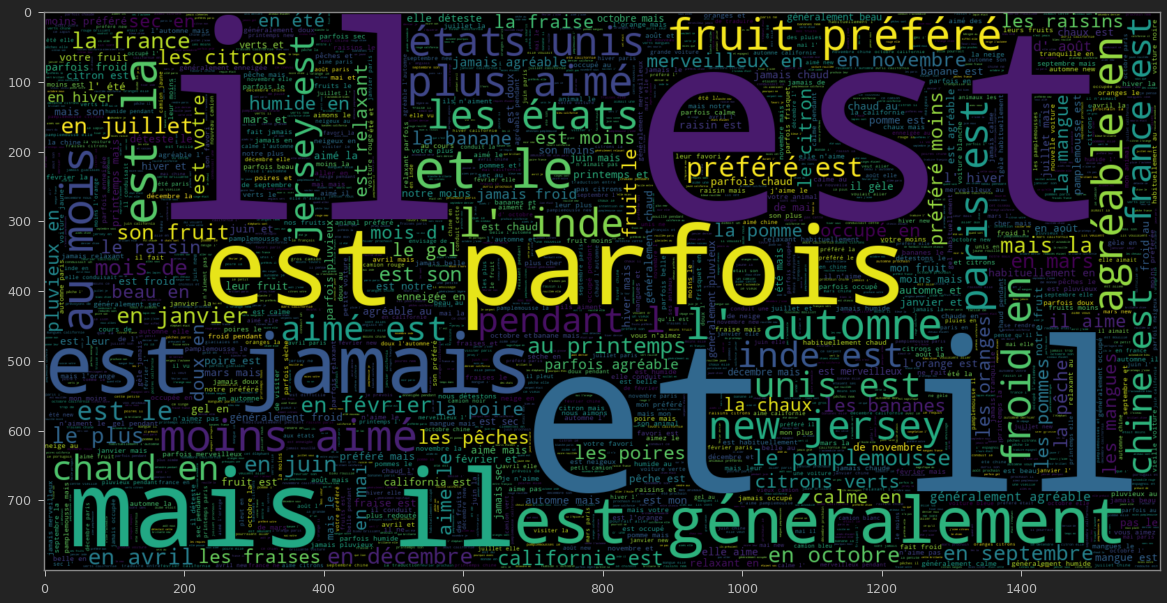

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
df.french[0]
nltk.word_tokenize(df.french[0])

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 "'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril']

In [ ]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


 PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [ ]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [ ]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [ ]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [ ]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [ ]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_french) #to make all length same
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french) 

BUILD AND TRAIN THE MODEL

In [ ]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen_french, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 524s 5ms/sample - loss: 2.7114 - accuracy: 0.4942 - val_loss: 2.1295 - val_accuracy: 0.5317
Epoch 2/10
111666/111666 [==============================] - 562s 5ms/sample - loss: 1.9164 - accuracy: 0.5692 - val_loss: 1.6357 - val_accuracy: 0.6055
Epoch 3/10
111616/111666 [============================>.] - ETA: 0s - loss: 1.5234 - accuracy: 0.6141

In [ ]:
# save the model
model.save("weights.h5")

ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [ ]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))